<a href="https://colab.research.google.com/github/Karthik21895/SUPERMARKET-SALES-PROJECT-_-PYTHON/blob/main/PYTHON_PROJECT_WEEK_5_MANDATORY_ASSIGNMENT_(SUPER_MARKET_SALES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***INTRODUCTION TO DATA SET:***
The dataset contains the data sales for a supermarket company from 3 different Cities(branches) with 6 types of Products. Thre is three months data in this


***Variables used in Data Set:***
Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorisation groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by the customer

Tax: 5% tax fee for customer buying

Total: Total price including tax


Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10 am to 9 pm)

Payment: Payment used by the customer for the purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [86]:
from google.colab import files
uploaded=files.upload()

Saving Python_mandatory_project_supermarket_sales.xlsx to Python_mandatory_project_supermarket_sales (4).xlsx


In [111]:
dataframe=pd.read_excel('Python_mandatory_project_supermarket_sales.xlsx')   #Assigning the given file as dataframe

In [112]:
dataframe.info()   #getting Info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

Text(0, 0.5, 'Distribution of Male & Female')

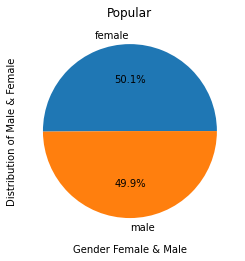

In [89]:
#(1)Is your supermarket more popular with males or females?
x=dataframe['Gender'].value_counts()    #assigning  x to gender unique value counts  
y=['female','male']                      #Assigning y to male, female 
plt.pie(x,labels=y,autopct='%1.1f%%',startangle=0) #function pie to use pie chart inputing x,y in pie & autoct is for number in the image that represent the % in float
plt.title("Popular")    #Title name :popular
plt.xlabel("Gender Female & Male") #X-axis
plt.ylabel("Distribution of Male & Female")  #Y axis       

**Result:** As per the result , it seems supermarket is popular with Female with 
0.1% more when compare with male

Text(10.049999999999997, 0.5, 'Frequency')

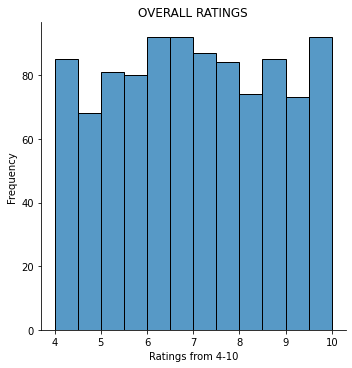

In [90]:
#(2)What does the customer rating look like and can you also comment on its distribution? 
#we use displot for frequency distribution
sns.displot(dataframe, x="Rating", bins = 12) 
plt.title("OVERALL RATINGS")    #for title
plt.xlabel('Ratings from 4-10')  #for x axis
plt.ylabel("Frequency")          #for y axis

Result: Ratings looks like Symmetric and there seems to be no skewness on the left or right side of the distribution

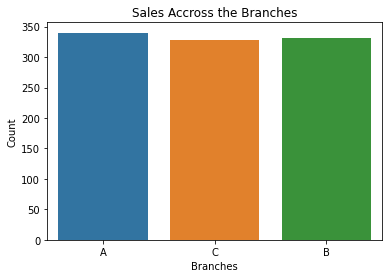

In [122]:
#(3)What can you say about the aggregate sales across the branches?
dataframe.groupby(['Branch']).mean()      # using group by function for splitting, by mean()
sns.countplot(x='Branch',data=dataframe)   #For counts of observations  , we use countplot for comparing each other
plt.title("Sales Accross the Branches")    #for title
plt.xlabel('Branches')  #for x axis
plt.ylabel("Count")          #for y axis   
plt.show() 

Result shows: 'A' Branch is some higher than 'B' & 'C'

Text(0, 0.5, 'NO . Of Payments')

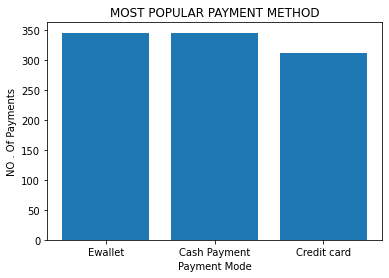

In [62]:
#(4)Which is the most popular payment method used by customers?
#For comparing the modes , Bar or Pie will be the best .
A=dataframe['Payment'].value_counts()     #Assigning the Payment column unique values to A
B=['Ewallet','Cash Payment','Credit card'] #Assigning three modes of payment to B
plt.bar(B,A)                               # I want the output the three modes of payment in X axis & No.of Payments in Y axis
plt.title("MOST POPULAR PAYMENT METHOD")    #for title                                
plt.xlabel('Payment Mode')        
plt.ylabel("NO . Of Payments")



Text(0.5, 1.0, 'MOST POPULAR PAYMENT METHOD')

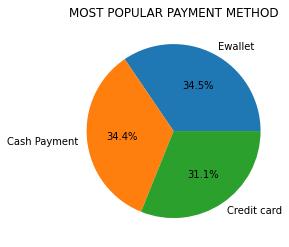

In [ ]:
#USing Pie for the same Question(4 th Question)
plt.pie(A,labels=B,autopct='%1.1f%%',startangle=0)
plt.title("MOST POPULAR PAYMENT METHOD")    #for title 

Result: As pe the above result, both Ewallet & Cash Payment both are popular 
but Ewallet is 0.1 % more compared to Cash payment

Text(0.5, 1.0, 'Income that affects Rating')

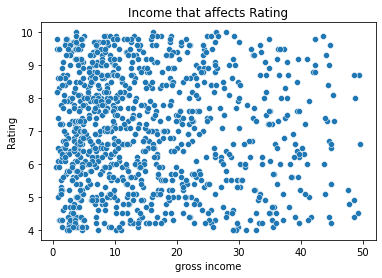

In [63]:
#(5)Does gross income affect customer ratings? 
#as the gross income & Ratings are two numerical datas. We use scatterplot 
sns.scatterplot(x= "gross income", y= "Rating", data = dataframe)
plt.title("Income that affects Rating")   

Result: From the output, the answer is  No, Gross Income does not affect the Ratings 

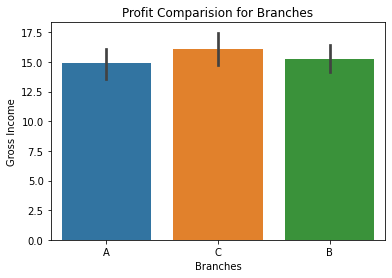

In [64]:
#(6)Which is the most profitable branch? 
sns.barplot(x='Branch',y='gross income',data=dataframe) #we use bar display data.
plt.title("Profit Comparision for Branches")  #for title
plt.xlabel('Branches')  #for x axis
plt.ylabel("Gross Income")          #for y axis
plt.show()  

Result: Branch 'C' is more profitable branch when compared to remaining 

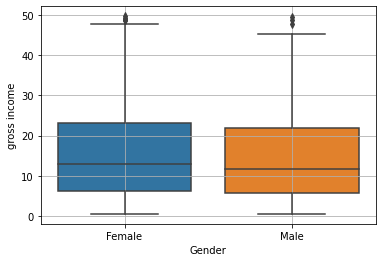

In [65]:
#(7)Create a boxplot between Gender and Gross income and explain the results?
sns.boxplot(x='Gender',y='gross income', data=dataframe)
plt.grid(True)

Result:
 - female customers spend slightly higher compare to male

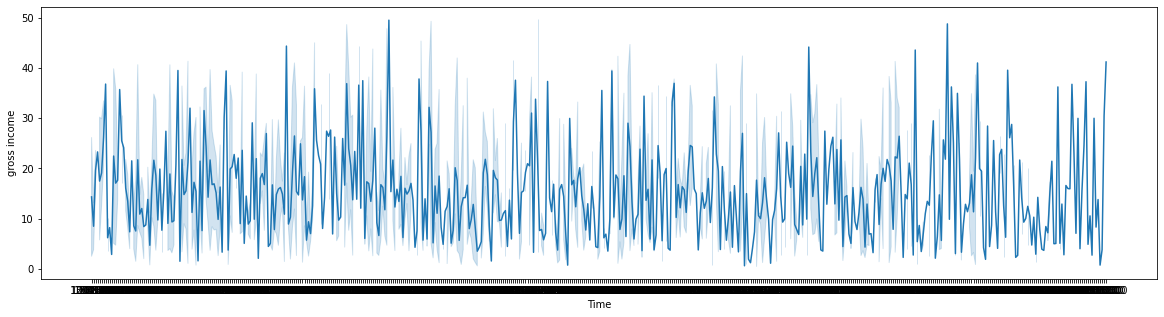

In [131]:
#(8)Can you see any time trend in gross income? 
fig = plt.figure(figsize=(20,5))   #plt.fig()- Used to get the size of the figure by X axis & y Axis
dataframe['Time']=dataframe['Time'].astype(str)   #Converted the time into String 
sns.lineplot(x='Time',y='gross income',data=dataframe) #for time Trend , Line plot is the best to visualize

In [ ]:
dataframe.dtypes

Result: We can not see time trend in this observation, some days its high , some days its low. Its like an average 

In [113]:
#(9)What is the spending pattern of both males and females, meaning in which category do they spend more? 
Product_line={'PD1':'Health and beauty','PD2':'Electronic accessories','PD3':'Home and lifestyle','PD4':'Sports and travel','PD5':'Food and beverages','PD6':'Fashion accessories'}
dataframe['Product code']=dataframe['Product code'].map(Product_line)
  

Text(0.5, 1.0, 'Spending Pattern of Gender')

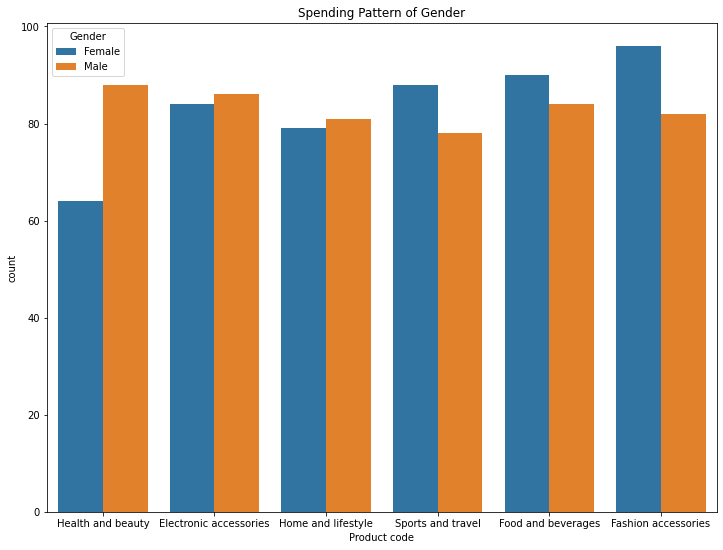

In [114]:
fig = plt.figure(figsize=(12,9))
sns.countplot(x='Product code', hue='Gender', data= dataframe)  #hue is used for getting different colours for given columns(data in column)
plt.title("Spending Pattern of Gender") #for title

Result: # Male spends more interest on PD1(i.e Health and beauty) &&    #Female spends more interest on PD6(i.e Fashion accessories)

Text(0.5, 1.0, 'Nuber of products brought by customers')

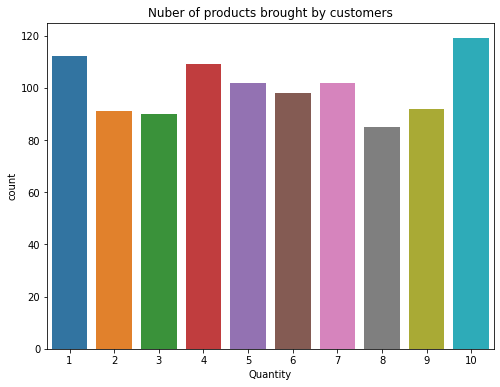

In [68]:
#(10)How many products are bought by customers?
fig = plt.figure(figsize=(8,6)) 
sns.countplot(x='Quantity',data = dataframe)
plt.title("Nuber of products brought by customers") 


Result: Most of the customers bought 10 Products

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


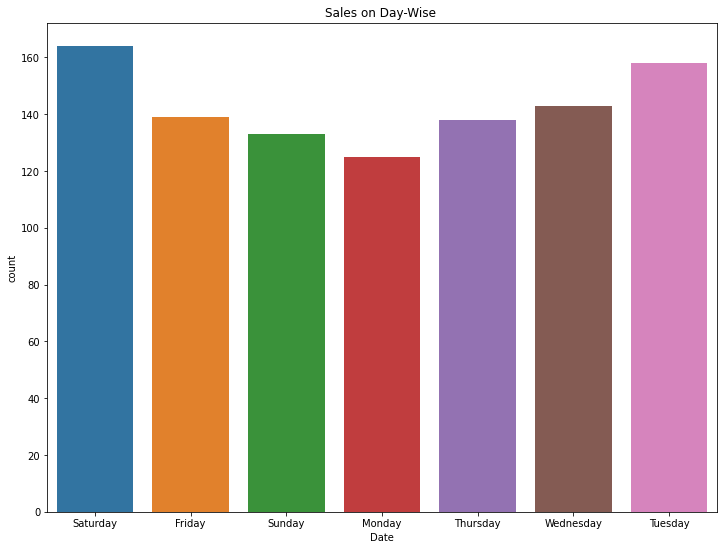

In [133]:
#(11)Which day of the week has maximum sales?

import datetime             #importing datetime library
Day=dataframe['Date'].dt.day_name()  #assigning the name of the day to 'Day'
fig = plt.figure(figsize=(12,9)) 
plt.title('Sales on Day-Wise ')    
sns.countplot(Day)
plt.show()


Result: Saturday has maximum sales in the week 

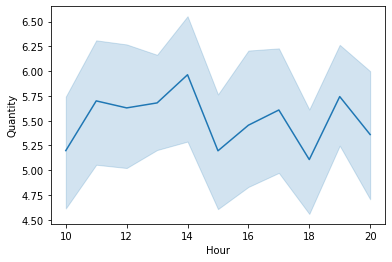

In [132]:
#(12)Which hour of the day is busiest? 
dataframe['Time'] = pd.to_datetime(dataframe['Time'])   # coverting the datataframe['Time'] to datatime
dataframe['Hour'] = (dataframe['Time']).dt.hour     # dt.hour gives only hour value  , assigning it to dataframe['Hour']
dataframe['Hour'].unique()                  # unique() is used to get unique values of the dataframe 
sns.lineplot(x="Hour",  y = 'Quantity',data =dataframe)

Result :  As per the graph , 14 th hour(2 pm) has maximum sales 

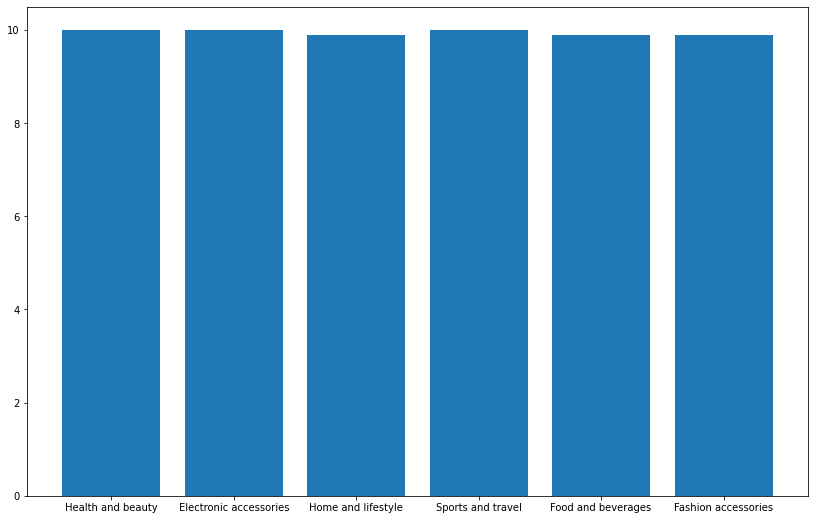

In [108]:
#(13)Which product line should your supermarket focus ?
fig = plt.figure(figsize=(14,9))
L=dataframe['Product code']
S=dataframe['Rating']
plt.bar(L,S)
plt.show()

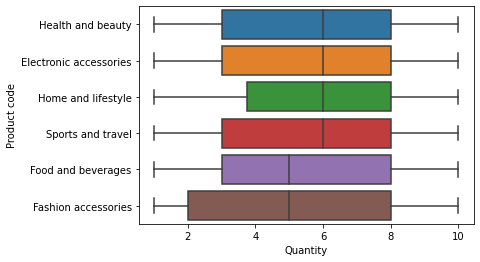

In [109]:
sns.boxplot(y = 'Product code', x = 'Quantity', data=dataframe )

Result: 

FROM 1 st graph:
the Ratings for PD5(Food and beverages) is more 
Hence Supermarket should focus on this with more quantity , for more income &&
for PD3(Home and lifestyle) , since the ratings is low . super market can focus on that whether if they can prompt for implementation of innovative ideas to attract customers more 

FROM 2 nd Graph:
Though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but quantity purchased is low. Hence, supply for these products need to be increased

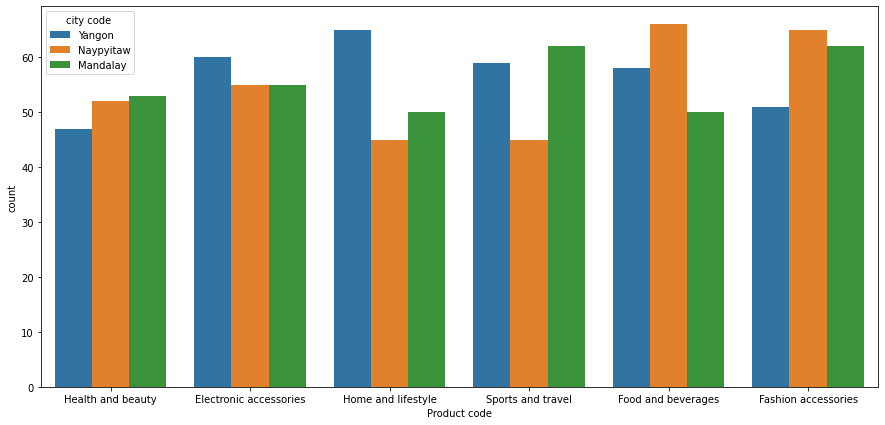

In [115]:
#(14)Which city should be chosen for expansion and what products should be focussed on?
dataframe['city code ']=dataframe['city code '].map({'CT1':"Yangon",'CT3':"Naypyitaw",'CT9':"Mandalay"})
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Product code',hue='city code ',data=dataframe)
plt.show()

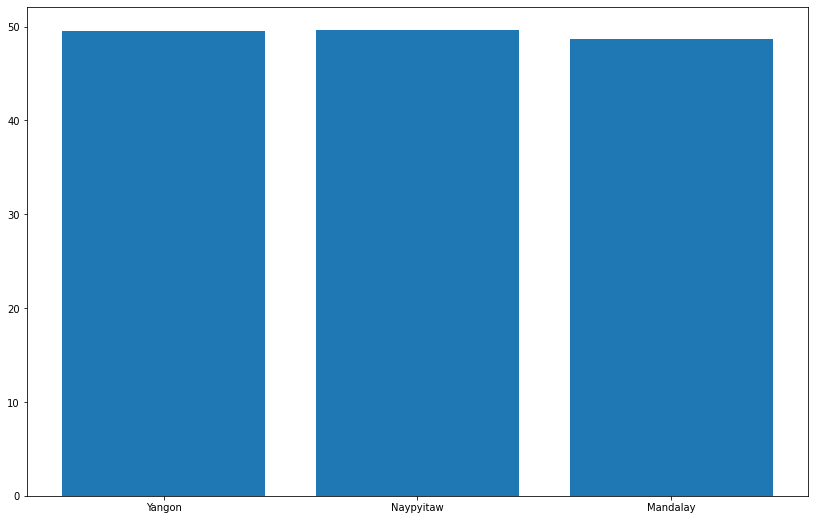

In [118]:
fig = plt.figure(figsize=(14,9))
CC=dataframe['city code ']
GI=dataframe['gross income']
plt.bar(CC,GI,data=dataframe)
plt.show()

Result:
from graph 1:
Food and beverages,Fashion accessories are most sold in Naypyitaw, so Naypyitaw should be chosen for Expansion

Further to that,
coming to product wise in the remaining cities,

We can also focus, Home and lifestyle for the City Yangon &&
Sports and travel for City Mandalay, because for highest solds

from graph 2: 
Naypyitaw is most profitable city , we should focus on that for expansion